In [5]:
import numpy as np
from PIL import Image

from densecrf_np import util
from densecrf_np.densecrf import DenseCRF
from densecrf_np.params import DenseCRFParams
from matplotlib import pylab

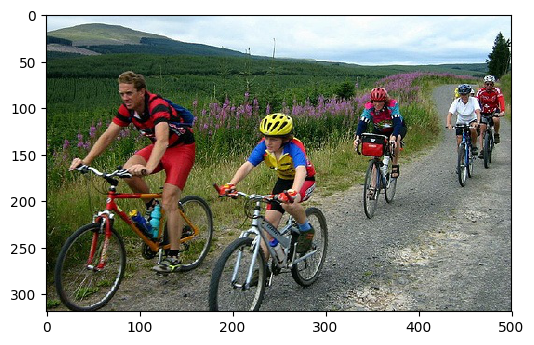

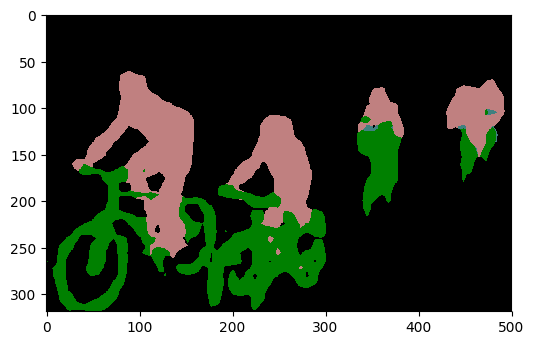

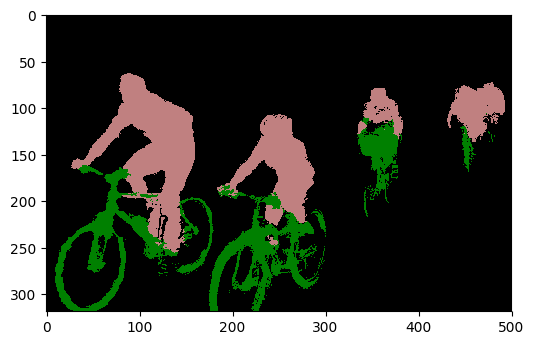

In [7]:

image_source = '../example/image.jpg'
# These unaries were obtained by running the FCN part of the model https://github.com/sadeepj/crfasrnn_keras
unary_logits_source = '../example/unary_logits.npy'
logits = np.load(unary_logits_source)

# Labels before the CRF
before_crf_labels = util.get_label_image(logits)

img = np.array(Image.open(image_source))
params = DenseCRFParams(spatial_ker_weight=1.5, bilateral_ker_weight=5.0)
crf = DenseCRF(img, params)
probs = crf.infer(logits, 5)

# Labels after the CRF
after_crf_labels = util.get_label_image(probs)

pylab.figure(dpi=100)
pylab.imshow(img)
pylab.figure(dpi=100)
pylab.imshow(before_crf_labels)
pylab.figure(dpi=100)
pylab.imshow(after_crf_labels)

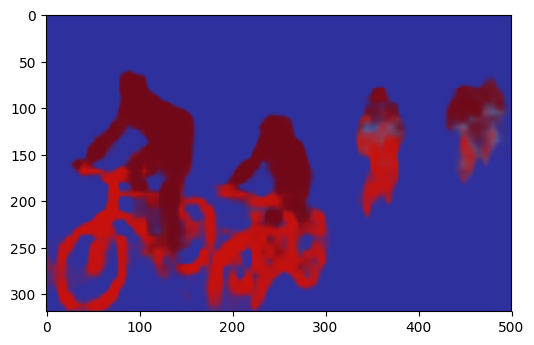

In [73]:
embeddings_map = np.random.rand(logits.shape[-1], 16)
inds = np.linspace(0, logits.shape[-1]-1, logits.shape[-1]-1).astype("int")
props = np.exp(logits) / np.sum(np.exp(logits), axis=-1, keepdims=True)
embeddings = np.dot(props, embeddings_map).astype("float32")
pylab.figure(dpi=100)
pylab.imshow(embeddings[..., :3])

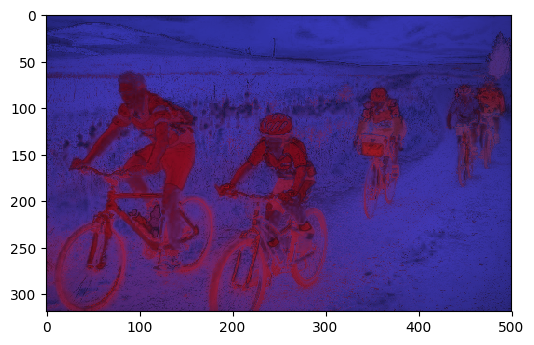

In [74]:
from densecrf_np.pairwise import SpatialPairwise, BilateralPairwise
alpha, beta, gamma = params.alpha, params.beta, params.gamma
bp = BilateralPairwise(img, alpha, alpha, beta, beta, beta)
sp = SpatialPairwise(img, gamma, gamma)
spatial_weight = params.spatial_ker_weight
bilateral_weight = params.bilateral_ker_weight
a = embeddings
a = (
    bp.apply(a) * bilateral_weight + 
    sp.apply(a) * spatial_weight + 
    embeddings
) / (bilateral_weight + spatial_weight + 1)
a = (
    bp.apply(a) * bilateral_weight + 
    sp.apply(a) * spatial_weight + 
    embeddings
) / (bilateral_weight + spatial_weight + 1)
a = (
    bp.apply(a) * bilateral_weight + 
    sp.apply(a) * spatial_weight + 
    embeddings
) / (bilateral_weight + spatial_weight + 1)

# a = bp.apply(a)
# a = bp.apply(a)
pylab.figure(dpi=100)
pylab.imshow(a[..., :3])